## Dataset

m2caiSeg
Semantic Segmentation of Laparoscopic Images

### Acknowledgement

https://www.kaggle.com/datasets/salmanmaq/m2caiseg

### Preprocessing
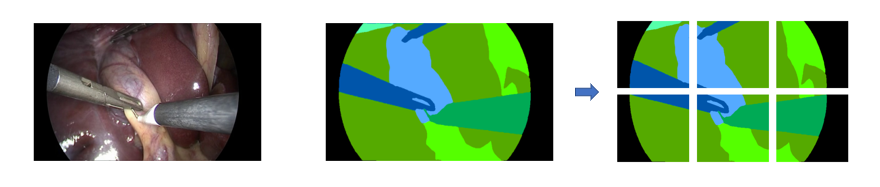

In [1]:
from keras.models import load_model
from patchify import patchify, unpatchify
import glob
from skimage import io
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np

model = load_model("./model_pix2pix.h5", compile=False)

In [2]:
path='./m2caiSeg dataset/new_gt/225.png'
def Predict(path):
    I = io.imread(path)
    r_img = Image.fromarray(I)
    r_img = np.array(r_img.resize((768,512)))
    img =(r_img-127.5)/127.5

    patches = patchify(img, (256,256,3), step=64)
    
    P = []
    for i in range(patches.shape[0]):
        for j in range(patches.shape[1]):
        
            P_img = patches[i,j,:,:,:,:]
            img_prediction = model.predict(P_img)
            img_prediction=(img_prediction+1)/2.0
            P.append(img_prediction)
        
    P_reshaped = np.reshape(np.array(P), (patches.shape[0], patches.shape[1],1,256,256,3))
    R_image = unpatchify(P_reshaped, r_img.shape)
    
    return R_image

(-0.5, 767.5, 511.5, -0.5)

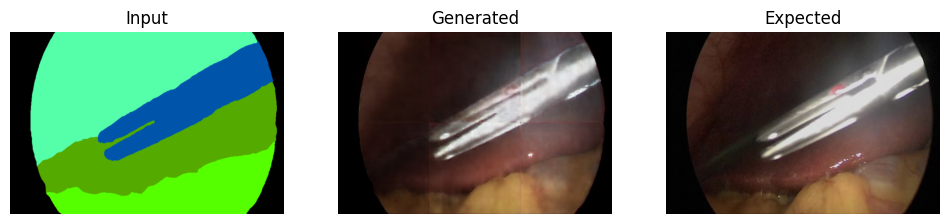

In [3]:
img=cv2.resize(io.imread('./m2caiSeg dataset/images/225.jpg'),(768,512))
mask=cv2.resize(io.imread(path),(768,512))
pred=Predict(path)

plt.figure(figsize=(12,8))
plt.subplot(131)
plt.imshow(mask)
plt.title('Input')
plt.axis('off')
plt.subplot(132)
plt.imshow(pred)
plt.title('Generated')
plt.axis('off')
plt.subplot(133)
plt.imshow(img)
plt.title('Expected')
plt.axis('off')